In [1]:
%run my_functions.ipynb

## SAT Problem 2

### From Paper 1, 
#### F1(x1,x2,x3,x4) = (x1 v ~x2 v x3 v x4) & (x1 v x2 v x3 v ~x4) & (~x1 v x2 v x3 v x4) & (x1 v x2 v x3 v x4)

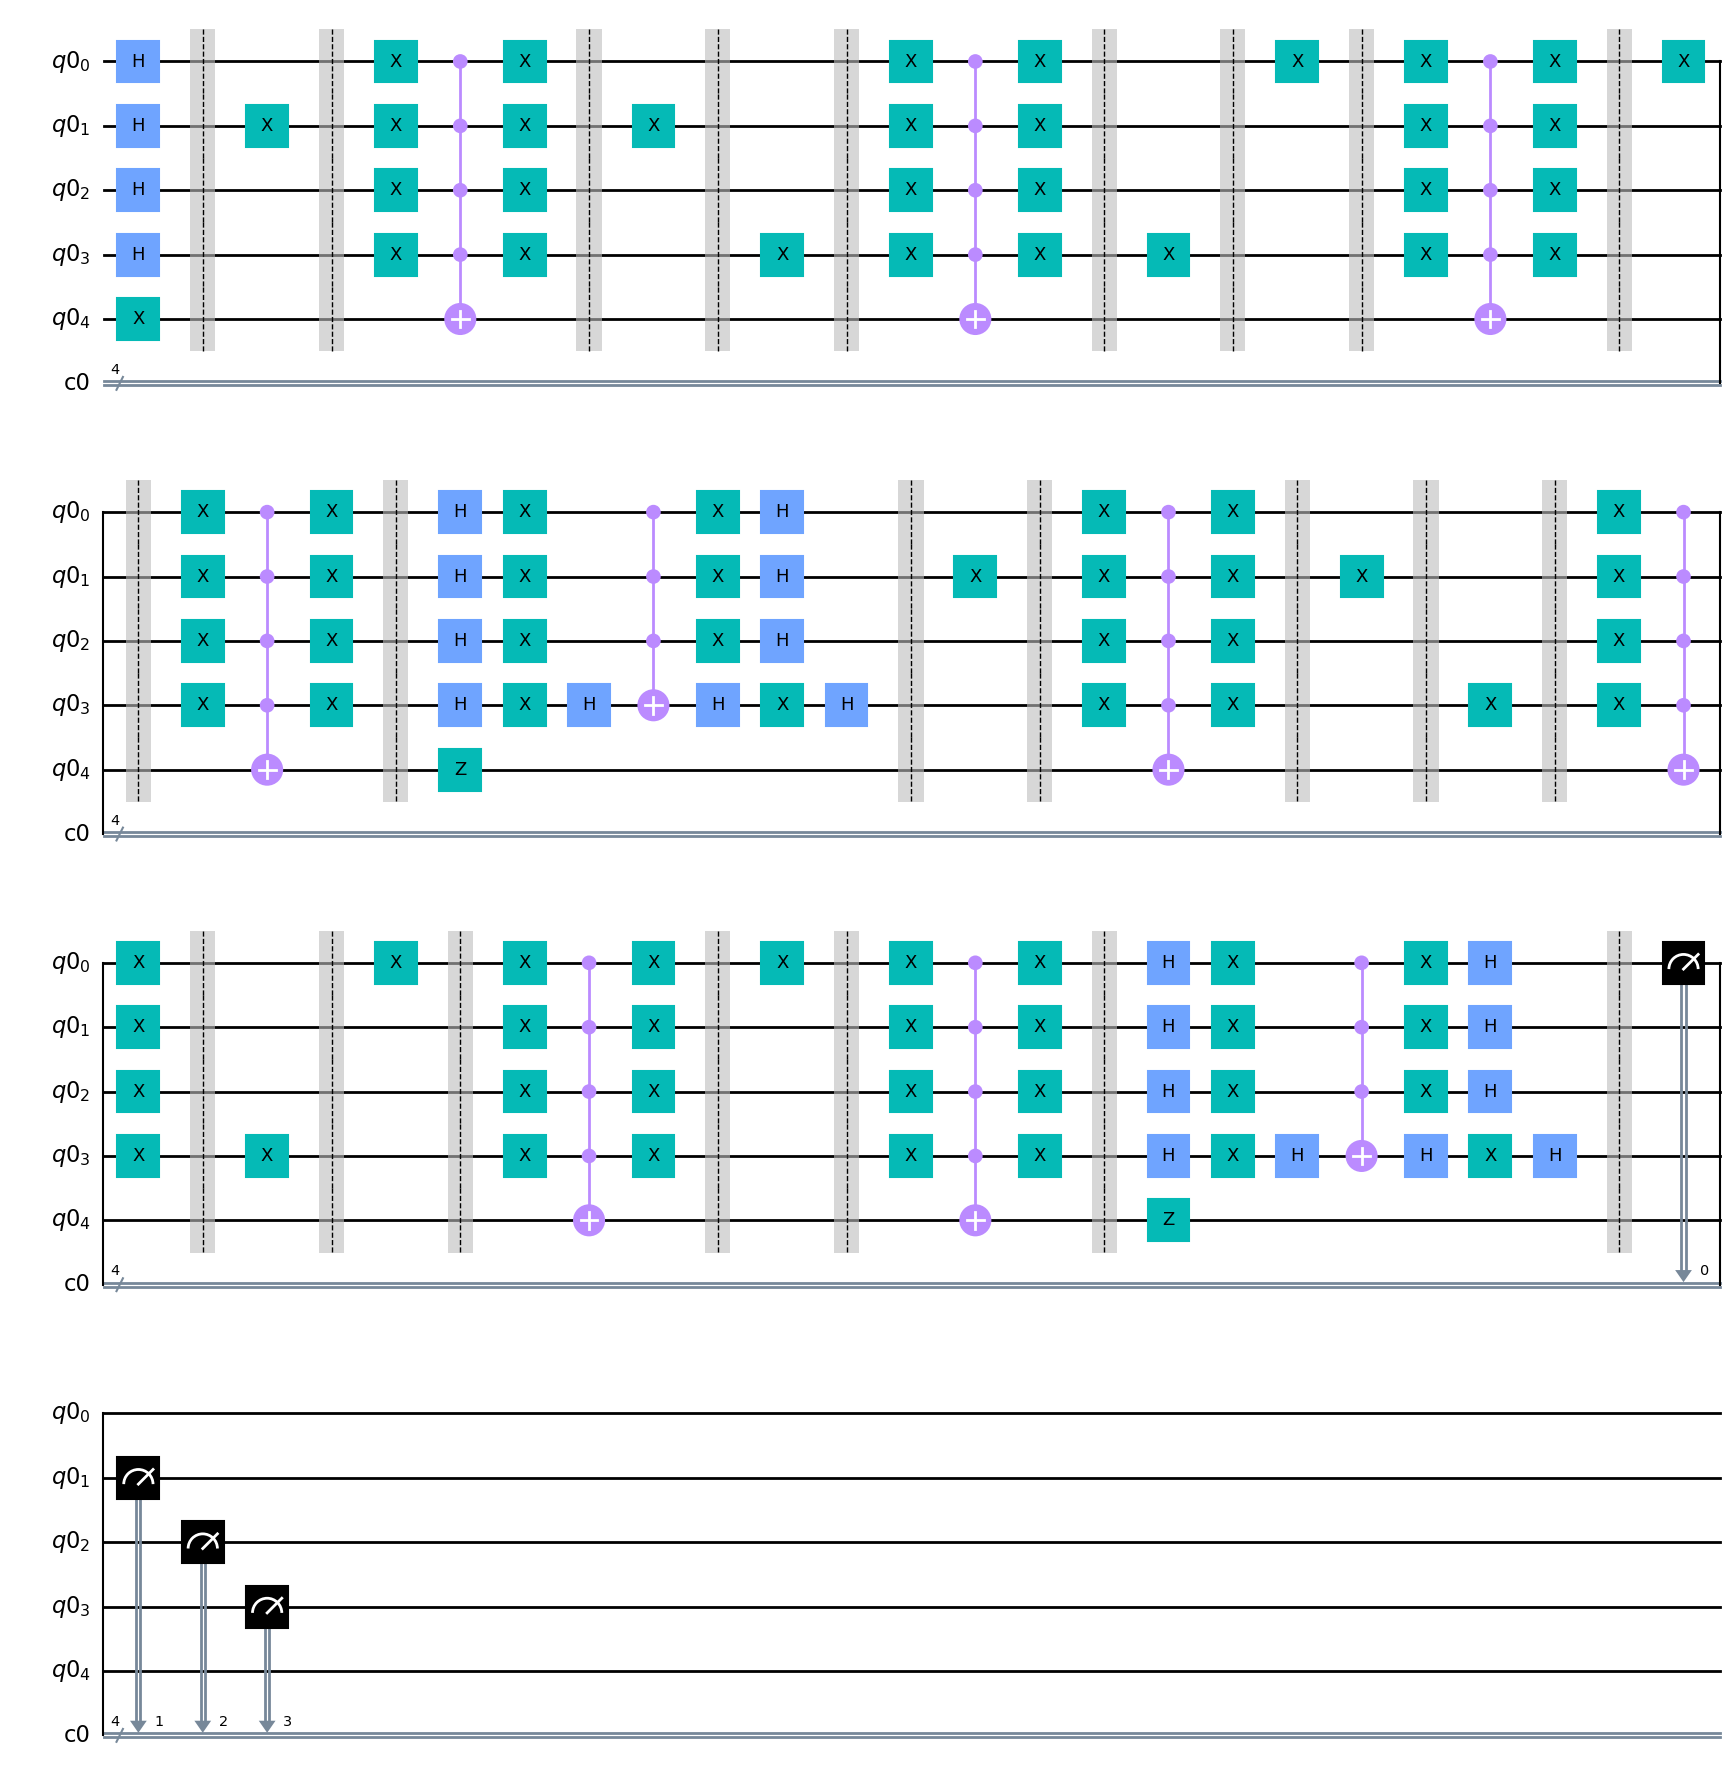

In [2]:
clause1 = [1,-2,3,4]
clause2  =[1,2,3,-4]
clause3 = [-1,2,3,4]
clause4 = [1,2,3,4]

qr = QuantumRegister(len(clause1)+1)
cr = ClassicalRegister(len(clause1))
qc = QuantumCircuit(qr,cr)
qc.h(qr[:len(clause1)])
qc.x(qr[-1])
qc.barrier()

#Marking solution by oracle function
for i in range(2):
    
    encode_clause(clause1,qc,qr)
    encode_clause(clause2,qc,qr)
    encode_clause(clause3,qc,qr)
    encode_clause(clause4,qc,qr)
    qc.z(qr[-1])

#Diffusion operator
    qc.h(qr[:-1])
    qc.x(qr[:-1])
    qc.h(qr[-2])
    qc.mct([qr[i] for i in range(len(clause1)-1)],qr[[-2]])
    qc.h(qr[-2])
    qc.x(qr[:-1])
    qc.h(qr[:-1])
    qc.barrier()
#Measurement
qc.measure(qr[:-1],cr[:])
qc.draw('mpl')

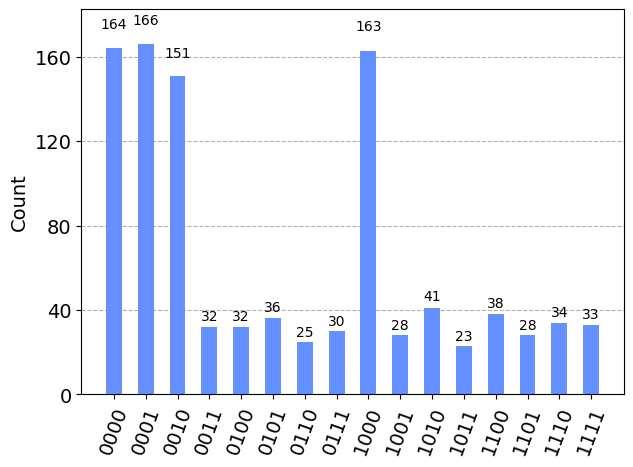

In [3]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(result)